## Importing the libraries

In [136]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## DataCleaning

In [137]:
dataSet_path = 'Wine.csv'
df = pd.read_csv(dataSet_path)
#---------------------------------------
import warnings
warnings.filterwarnings("ignore")
#----------------------------------------
df.dropna()
df.dropna(axis=1)
#df["Glucose"].fillna(df["Glucose"].mean(),inplace=True)
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)
df


Missing values in each column:
 Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


## Splitting the dataset

In [138]:

X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values


 ## Splitting the dataset into the Training set and Test set 


In [139]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


## Feature Scaling

In [140]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
 

## Applying the PCA function into the training and testing set for analysis. 

In [141]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
#Now, we can see that the PC1 contributes to 99% of the variance, and PC2 to .001% of the varianc.
# which sums up to 99% of the variance in the data is explained by these two Principal Components. The remaining 1% is what was “discarded” when reducing dimensions.


[0.36884109 0.19318394]


## Fitting Logistic Regression To the training set



In [142]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

##  Predicting the test set result 


In [143]:
y_pred = classifier.predict(X_test)

##  Making the confusion matrix 

In [144]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print(cm)

[[14  0  0]
 [ 1 15  0]
 [ 0  0  6]]


##  Visualization cofiusion Matrix

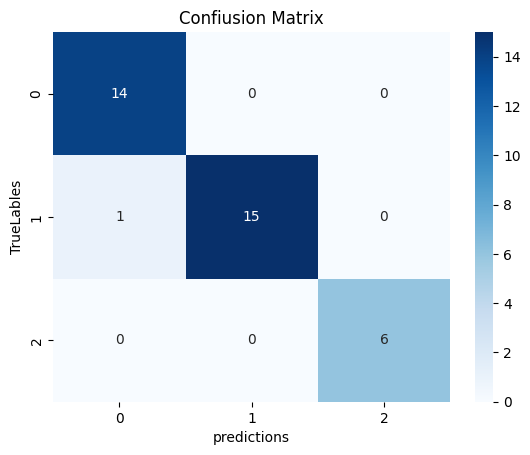

In [145]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title("Confiusion Matrix")
plt.xlabel("predictions")
plt.ylabel("TrueLables")
plt.show()


##  visualization Logistic Regression for Training set

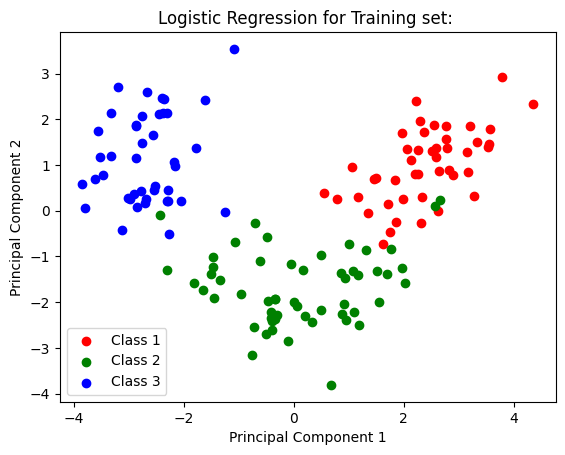

In [149]:

colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], color=color, label=label)

plt.title('Logistic Regression for Training set: ') 
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

##  visualization Logistic Regression for Test set

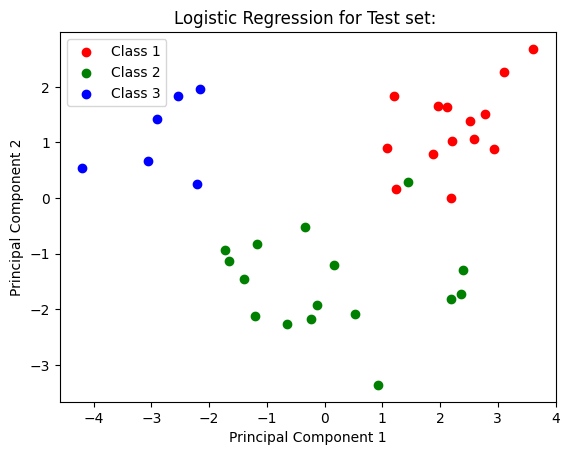

In [147]:

colors = ["r", "g", "b"]
labels = ["Class 1", "Class 2", "Class 3"]
for i, color, label in zip(np.unique(y), colors, labels):
    plt.scatter(X_test[y_test == i, 0], X_test[y_test == i, 1], color=color, label=label)
plt.title('Logistic Regression for Test set: ') 
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()